In [1]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

(array([ 73., 405., 423., 475., 148.,  51.,  18.,   3.,   2.,   1.]),
 array([0.12 , 0.266, 0.412, 0.558, 0.704, 0.85 , 0.996, 1.142, 1.288,
        1.434, 1.58 ]),
 <BarContainer object of 10 artists>)

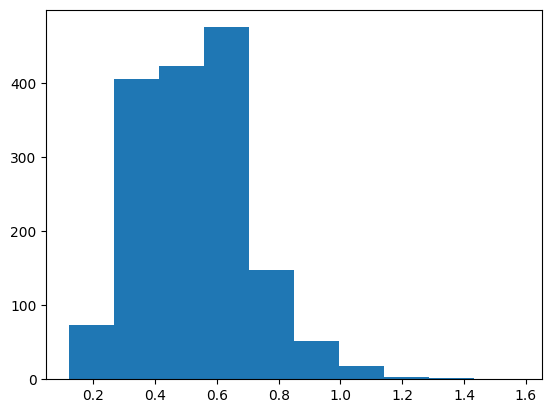

In [8]:
plt.hist(df['volatile acidity'])

In [15]:
#Shaprio Test for normal distribution
#data is left skewed now test it using normality test -shaprio

from scipy.stats import shapiro

stat, p = shapiro(df['volatile acidity'])

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not a normal distribution')

stat=0.97, p=0.000000000000000268638537394731
Not a normal distribution


In [16]:
# K^2 test for normal distribution

from scipy.stats import normaltest

stat, p = normaltest(df['volatile acidity'])

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal Distribution')
else:
    print('Not a normal distribution')

stat=143.42, p=0.000000000000000000000000000000
Not a normal distribution


Correlation Test

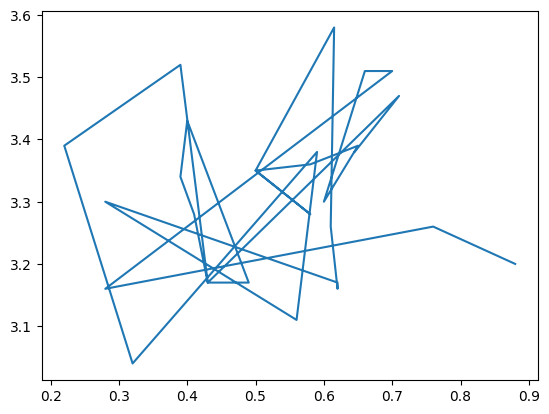

In [18]:
plt.plot(df[1:30]['volatile acidity'], df[1:30]['pH'])

In [21]:
#above chart is not showing any pattern for correlation between two variables

from scipy.stats import spearmanr

stat, p = spearmanr(df[1:30]['volatile acidity'], df[1:30]['pH'])

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.20, p=0.301357116233687938322560739834
independent samples


In [22]:
from scipy.stats import pearsonr

stat, p = pearsonr(df[1:30]['volatile acidity'], df[1:30]['pH'])

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.18, p=0.360465837727471927198763523847
independent samples


In [25]:
# checking the corr matrix

df.corr(method='pearson').style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [26]:
#Lets check with higher correlated variables

from scipy.stats import spearmanr

stat, p = spearmanr(df['free sulfur dioxide'], df['total sulfur dioxide'])

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.79, p=0.000000000000000000000000000000
dependent samples


In [27]:
stat, p = pearsonr(df['fixed acidity'], df['density'])

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.67, p=0.000000000000000000000000000000
dependent samples


Chi Square test

In [29]:
loan = pd.read_csv('loan.csv')
loan.head()

C:\Users\RAHUL AVSSTECH\AppData\Local\Temp\ipykernel_7488\3677655166.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [33]:
contingency_data = pd.crosstab(loan['purpose'], loan['loan_status'], margins=False)

contingency_data

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160,50,1339
credit_card,542,103,4485
debt_consolidation,2767,586,15288
educational,56,0,269
home_improvement,347,101,2528
house,59,14,308
major_purchase,222,37,1928
medical,106,12,575
moving,92,7,484


In [37]:
from scipy.stats import chi2_contingency

stat, p, dof, expected = chi2_contingency(contingency_data)

print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('independent category')
else:
    print('dependent category')

stat=445.695, p=0.000
dependent category


ANOVA test

In [38]:
# The ANOVA test is used to compare the means of two or more groups to determine 
# if there are any statistically significant differences between them.

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
# Use the f_oneway function from the scipy.stats module to perform the ANOVA test.
from scipy.stats import f_oneway

# Perform ANOVA test
result = f_oneway(df['fixed acidity'], df['volatile acidity'], df['density'])

# Get the ANOVA test statistics and p-value
f_statistic = result.statistic
p_value = result.pvalue

# Output the results
print("ANOVA F-statistic:", f_statistic)
print("P-value:", p_value)

# Check for statistical significance at a chosen significance level (e.g., 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference between the groups.")
else:
    print("There is no statistically significant difference between the groups.")


ANOVA F-statistic: 29896.8079869784
P-value: 0.0
There is a statistically significant difference between the groups.


t-test

In [41]:
# The t-test is used to compare the means of two groups and determine if there is a statistically significant difference between them

In [44]:
from scipy.stats import ttest_ind

# Perform independent samples t-test
result = ttest_ind(df['free sulfur dioxide'], df['total sulfur dioxide'])

# Get the t-statistic and p-value
t_statistic = result.statistic
p_value = result.pvalue

# Output the results
print("Independent Samples T-Test:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Check for statistical significance at a chosen significance level (e.g., 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

Independent Samples T-Test:
T-statistic: -35.44004727962197
P-value: 2.48311577263352e-232
There is a statistically significant difference between the two groups.
